# Accessing the `pyHalo` subhalo realizations

This notebook demonstrates how to work with the subhalo realizations from `pyHalo`.

In [19]:
import os
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pyHalo
import tarfile
import pickle
from glob import glob
from pprint import pprint

# Untar the subhalos

Make sure to update the filepath in the block below!

In [2]:
targz_filepath = '/data/bwedig/mejiro/h5_export/subhalos.tar.gz'  # TODO update this path!
parent_dir = os.path.dirname(targz_filepath)

with tarfile.open(targz_filepath, 'r:gz') as tar:
    tar.extractall(path=parent_dir)

We now have a folder `subhalos` in the directory where the `.tar.gz` file lives. Within that folder are `.pkl` files for the subhalo realizations.

# Deserialize using `pickle`

We'll retrieve the subhalo realization for the system in the `view_dataset` notebook

In [15]:
subhalo_pickles = sorted(glob(os.path.join(parent_dir, 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(subhalo_pickles)} subhalo realization(s)')

Found 14706 subhalo realization(s)


In [5]:
subhalo_pickle = glob(os.path.join(parent_dir, 'subhalos', f'subhalo_realization_{str(3190).zfill(8)}.pkl'))[0]

with open(subhalo_pickle, 'rb') as f:
    subhalo_realization = pickle.load(f)

# Use `pyHalo` to study the subhalo population

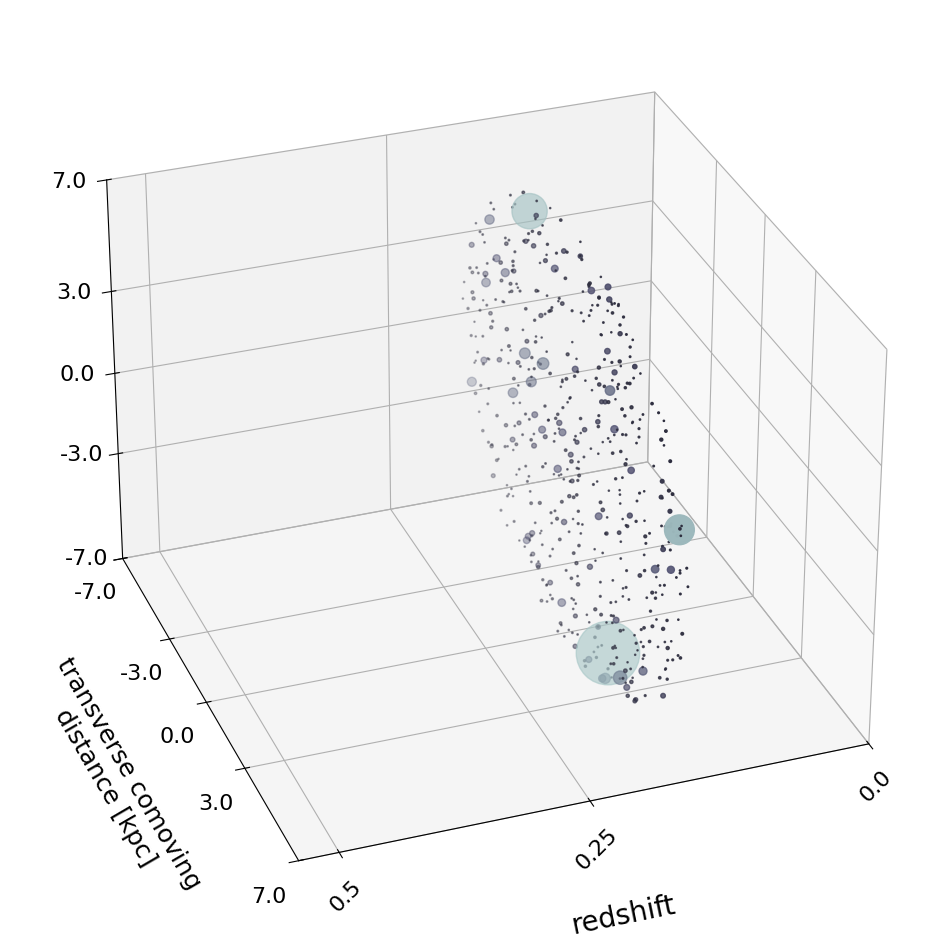

In [11]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
subhalo_realization.plot(ax)

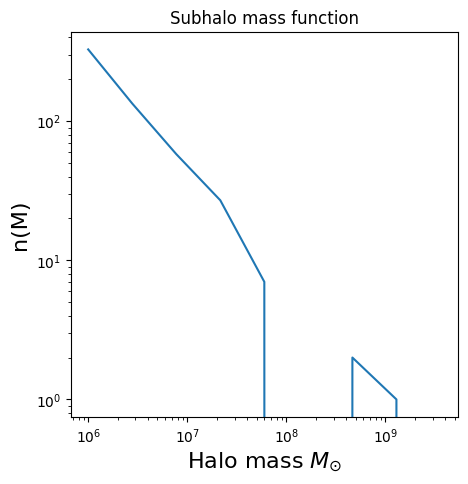

In [14]:
cdm_halo_masses = [halo.mass for halo in subhalo_realization.halos]
N, m = np.histogram(cdm_halo_masses, bins=np.logspace(6, 10, 10))

f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.loglog(m[0:-1], N)
ax.set_xlabel('Halo mass '+r'$M_{\odot}$', fontsize=16)
ax.set_ylabel('n(M)', fontsize=16)
ax.set_title('Subhalo mass function')
plt.show()

# Retrieve parameters of an individual subhalo

We'll look at the details of the most massive subhalo

In [21]:
largest_halo = max(subhalo_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 2.75e+09 Msun

{'_args': {},
 '_c': 2.240420785501498,
 '_concentration_class': <pyHalo.Halos.concentration.ConcentrationDiemerJoyce object at 0x7f5b1b541e70>,
 '_kwargs_lenstronomy': [{'Rs': 4.1661437731,
                          'alpha_Rs': 0.0035738302,
                          'center_x': 0.7454,
                          'center_y': -1.6373,
                          'r_trunc': 0.04969468423518719}],
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f5b1b541870>,
 '_profile_args': (2.240420785501498, 0.1487239118611859),
 '_rescale_norm': 1.0,
 '_rescaled_once': False,
 '_time_since_infall': 10.905939463272142,
 '_truncation_class': <pyHalo.Halos.tidal_truncation.TruncationGalacticus object at 0x7f5b1b542200>,
 '_z_infall': 7.295366194388207,
 '_zeval': 7.295366194388207,
 'fixed_position': False,
 'is_subhalo': True,
 'lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f5b1b541870>,
 'mass': 2753031357.2366457,
 'mdef': 'TNFW',
 'r3